In [1]:
#import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

file= "dm_export_19900101_20201231.csv"

df=pd.read_csv(file,parse_dates=["MapDate"])
df["Year"]=df["MapDate"].dt.strftime('%Y')
df

,State,County,FIPS,MapDate,DSCI,Year
0,AZ,Apache County,4001,2000-01-04,43,2000
1,AZ,Apache County,4001,2000-01-11,100,2000
2,AZ,Apache County,4001,2000-01-18,100,2000
3,AZ,Apache County,4001,2000-01-25,100,2000
4,AZ,Apache County,4001,2000-02-01,100,2000
...,...,...,...,...,...,...
73427,WY,Uinta County,56041,2020-12-01,235,2020
73428,WY,Uinta County,56041,2020-12-08,235,2020
73429,WY,Uinta County,56041,2020-12-15,236,2020
73430,WY,Uinta County,56041,2020-12-22,236,2020


In [2]:
df_wy=df.loc[df.State=="WY"]
df_wy=df_wy.drop(columns=["FIPS"])
df_wy

,State,County,MapDate,DSCI,Year
69048,WY,Lincoln County,2000-01-04,0,2000
69049,WY,Lincoln County,2000-01-11,0,2000
69050,WY,Lincoln County,2000-01-18,0,2000
69051,WY,Lincoln County,2000-01-25,0,2000
69052,WY,Lincoln County,2000-02-01,0,2000
...,...,...,...,...,...
73427,WY,Uinta County,2020-12-01,235,2020
73428,WY,Uinta County,2020-12-08,235,2020
73429,WY,Uinta County,2020-12-15,236,2020
73430,WY,Uinta County,2020-12-22,236,2020


In [3]:
df_wy_groups=df_wy.groupby(["State","Year"]).mean()

In [4]:
df_wy_groups.reset_index()

,State,Year,DSCI
0,WY,2000,85.370192
1,WY,2001,202.610577
2,WY,2002,366.018868
3,WY,2003,414.173077
4,WY,2004,323.288462
5,WY,2005,172.908654
6,WY,2006,123.201923
7,WY,2007,297.524038
8,WY,2008,217.495283
9,WY,2009,60.692308


In [5]:
df_wy_groups=df_wy_groups.groupby(["State","Year"]).mean().reset_index()
df_wy_groups

,State,Year,DSCI
0,WY,2000,85.370192
1,WY,2001,202.610577
2,WY,2002,366.018868
3,WY,2003,414.173077
4,WY,2004,323.288462
5,WY,2005,172.908654
6,WY,2006,123.201923
7,WY,2007,297.524038
8,WY,2008,217.495283
9,WY,2009,60.692308


<AxesSubplot:xlabel='Year'>

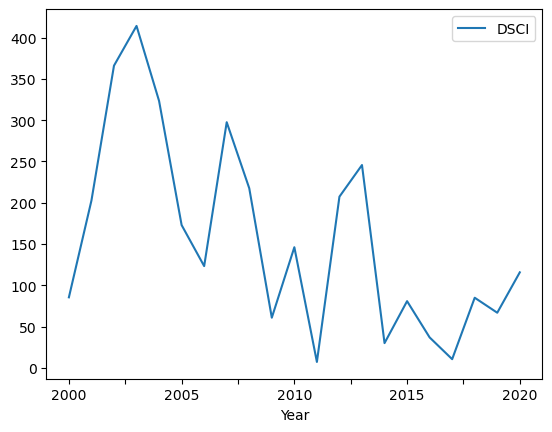

In [6]:
df_wy_groups.plot(x="Year")

In [7]:
df_wy_county_groups=df_wy.groupby(["County","Year"]).mean().reset_index()
df_wy_county_groups

,County,Year,DSCI
0,Lincoln County,2000,87.596154
1,Lincoln County,2001,246.153846
2,Lincoln County,2002,349.433962
3,Lincoln County,2003,422.961538
4,Lincoln County,2004,320.269231
...,...,...,...
79,Uinta County,2016,41.346154
80,Uinta County,2017,7.173077
81,Uinta County,2018,137.307692
82,Uinta County,2019,97.226415


In [8]:
county_list=df_wy["County"].unique()
county_list

array(['Lincoln County', 'Sublette County', 'Sweetwater County',
       'Uinta County'], dtype=object)

Lincoln County
Sublette County
Sweetwater County
Uinta County


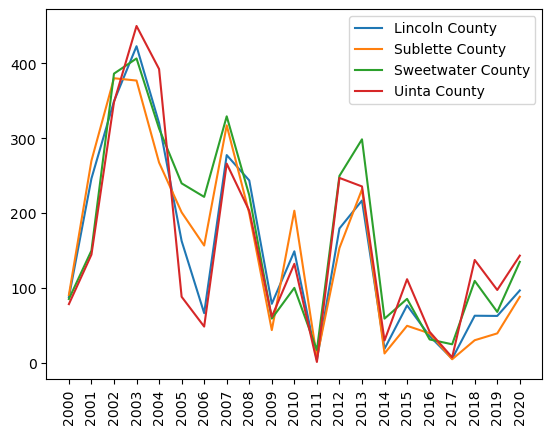

In [9]:
for county in county_list:
    print(county)
    df_wy_map=df_wy_county_groups.loc[df_wy_county_groups["County"]==county]
    df_wy_map=df_wy_map.drop(columns=["County"])
    df_wy_map=df_wy_map.rename(columns={"DSCI": county + " DSCI "})
    x2=df_wy_map["Year"].to_list()
    y2=df_wy_map[county + " DSCI "].to_list()
    plt.plot(x2,y2,label=county)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()